## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

The number of rows in the dataset are: **294478**

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

The number of unique users are: **290584**

d. The proportion of users converted.

In [5]:
df['converted'].mean()

0.11965919355605512

The proportion of users converted is: **0.119659** or **11.97%**

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('(group == "treatment" and landing_page == "old_page") or (group == "control" and landing_page == "new_page")').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

The number of times **new_page** doesn't line up with **treatment** can be computed by looking at the number of times **treatment** matches with **old_page** and the number of times **control** matches with **new_page**

The value is: **3893**

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


We use the **info()** method on the dataframe, **df** to look at the Non-null values. We find out that each of the columns have a Non-null value which is equal to the total number of rows in the dataset, i.e 294478.

**Therefore there are no missing values**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.query('(group == "treatment"  and landing_page == "new_page") or (group == "control" and landing_page == "old_page" )')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


We must remove rows where treatment is not aligned with new_page or control is not aligned with old_page.

We acheive this by **storing only** rows where treatment is aligned with new_page and control with old_page
in the new dataframe, **df2**




In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

The number of unique user_ids in **df2** are: **290584**

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2['user_id'].value_counts().head(1)

773192    2
Name: user_id, dtype: int64

Given only one user_id being repeated, we find the top most **user_id** that has many counts.

That user_id is **773192**

c. What is the row information for the repeat **user_id**? 

In [12]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop(1899)
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
converted_mean = df2['converted'].mean()
converted_mean

0.11959708724499628

The probability of an individual converting regardless of the page they receive is: **0.11959708724499628**

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

Given the **control** group, the probability of an individual converting is: **0.1203863045004612**

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

Given the **treatment** group, the probability of an individual converting is: **0.11880806551510564**

d. What is the probability that an individual received the new page?

In [17]:
df2['landing_page'].value_counts().new_page/df2.shape[0]

0.5000619442226688

The probability that an individual received a new page is : **0.5000619442226688**

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [18]:
df2.query('group == "control"').shape[0]

145274

In [19]:
df2.query('group == "treatment"').shape[0]

145310

**Answer:**

The general conversion probability and the conversion probabilities for both control and treatment groups are all approximately, **0.12** or **12%**.

This observation seems to suggest that the new treatment page doesn't lead to more conversions. Taking the non approximated probabilities might suggest that the new page has a lower probability of conversion.

There could be potentially a change aversion situation over here or even the duration for which the test was carried out might not be lenghty enough for us to have sufficient evidence.

We have another situation where there is unequal number of test subjects i.e unequal number of people in the control and treatment group


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

 The Null and Alternative Hypothesis respectively;
 
$
H_o = p_{new} - p_{old} \leq 0 \\
H_1 = p_{new} - p_{old} > 0
$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

The **convert rate** for $p_{new}$ under the null is **0.11959708724499628**

b. What is the **convert rate** for $p_{old}$ under the null? <br>

In [21]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

The **convert rate** for $p_{old}$ under the null is **0.11959708724499628**

c. What is $n_{new}$?

In [22]:
new = df2.query('group == "treatment"')
n_new = new.shape[0]
n_new

145310

$n_{new}$ is **145310**

d. What is $n_{old}$?

In [23]:
old = df2.query('group == "control"')
n_old = old.shape[0]
n_old

145274

$n_{old}$ is **145274**

In [24]:
p_new.mean() - p_old.mean()

0.0

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.choice([0,1], n_new, p=[1-p_new, p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.choice([0,1], n_old, p=[1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
p_diff

0.002193406043677154

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

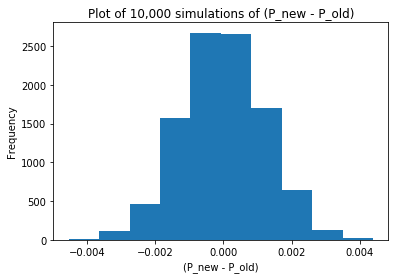

In [29]:
# p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
plt.xlabel('(P_new - P_old)')
plt.ylabel('Frequency')
plt.title('Plot of 10,000 simulations of (P_new - P_old)');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
actual_new_page_converted = df2.query('group == "treatment"')['converted']
actual_old_page_converted = df2.query('group == "control"')['converted']
actual_diff = actual_new_page_converted.mean() - actual_old_page_converted.mean()
actual_diff

-0.0015782389853555567

In [31]:
(p_diffs > actual_diff).mean()

0.9051

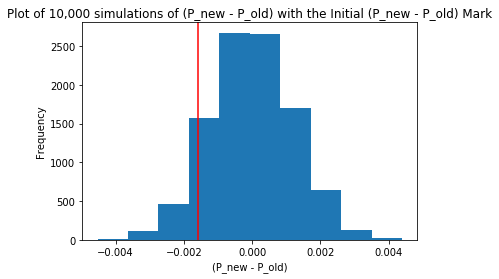

In [32]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
plt.xlabel('(P_new - P_old)')
plt.ylabel('Frequency')
plt.axvline(actual_diff, c="red")
plt.title('Plot of 10,000 simulations of (P_new - P_old) with the Initial (P_new - P_old) Mark');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

## **Answer**:
* We just calculated the p values
* We compute the probability of observing (Pnew -Pold) i.e our statistic, in order to either **REJECT** or **FAIL TO REJECT** our Null Hypothesis.
* With the computed p-value we can conclude the null hypthesis to be true, hence we **FAIL TO REJECT** it. The most extreme in favour of our alterntive hypothesis also determines the region we shade.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative="smaller")
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

## **Answer**
* Z-score below 1.5 means that the convertion rate for the new page is less than he 95% of the old page re-enforcing that we cannot reject the null hypotesis.
* The p-value also agrees with what we calculated in **j** and **k**, therefore, we **FAIL TO REJECT** the Null Hypothesis in this case too.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

## **Answer**
**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
df2['intercept'] = 1

In [36]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 29 Aug 2020   Pseudo R-squ.:               8.077e-06
Time:                        14:32:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

p-value = 0.190

This is different because we have different
null and alternative hypothesis compared to
what we set in Part 11. This is **two-sided.**

$
H_{0} = P_{new} - P_{old} = 0 \\
H_{1} = P_{new} - P_{old} \neq 0
$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

## **Answer**

* For an ecommerce website, there are seasons where conversion or even sales, shoot or plummet. Therefore, we need this additional data to guide our analysis as well.
* The duration is also key therefore the time for the analysis should be well-timed.
* There could be a lot of other external economic factors beyond the control of the website owner.
* It is best we consider some additional terms especially the ones which have practical significance on the business to inform our analysis because we cannot consider all additional terms.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [40]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [41]:
### Create the necessary dummy variables
df_new[['CA', 'UK',]] = pd.get_dummies(df_new['country'])[['CA', 'UK']]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [42]:
### Fit Your Linear Model And Obtain the Results
new_model = sm.Logit(df_new['converted'], df_new[['intercept', 'CA', 'UK']])
new_result = new_model.fit()
new_result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 29 Aug 2020   Pseudo R-squ.:               1.521e-05
Time:                        14:32:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

In [43]:
uk_relative_convert_rate = np.exp(0.0099)
uk_relative_convert_rate

1.0099491671175422

In [44]:
ca_relative_convert_rate = 1/np.exp(-0.0408)
ca_relative_convert_rate

1.0416437559600236

### Regression Conclusion

Compared to the Users from the US:
* UK users are **1.0099** times **more likely** to convert holding all other variables constant.
* Canadian users are however **1.0416** times **less likely** to convert holding all other variables constant.

We can assess the statistical significance of the various countries by looking at their p-values.
Only US appears to be statistically significant

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.


In [45]:
df_new['CA_ab_page'] = df_new['CA'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,CA_ab_page,UK_ab_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1


In [46]:
new_model2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK', 'CA_ab_page', 'UK_ab_page']])
new_result2 = new_model2.fit()
new_result2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 29 Aug 2020   Pseudo R-squ.:               3.482e-05
Time:                        14:32:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [47]:
# Users from UK who were part of the treatment group = UK_ab_page
np.exp(0.0314)

1.0318981806179213

In [48]:
# Users from Canada who were part of the treatment group = CA_ab_page
1/np.exp(-0.0469)

1.048017202119183

Compared to the Users from the US who belong to the treatment group:
* UK users who belong to the treatment group are **1.031898** times **more likely** to convert holding all other variables constant.
* Canadian users who belong to the treatment group are however **1.04802** times **less likely** to convert holding all other variables constant.


The interaction between country and page doesn't yield any different observation compared to the model without any interactions. The effect is not statistically significant looking at their p-values as well.

<a id='conclusions'></a>
## Conclusions

* The tests we carried out suggests that it will be better for the e-commerce website to keep the old website.
* We set out to investigate our Null Hypothesis which said the Conversion on the Old Page was equal or even better than that of the new page.
* We FAILED TO REJECT our NULL Hypothesis after our analysis which is the reason for the suggestion stated in the first point.
* This test is purely based on the data at hand and we admit some limitations which include Change Aversion and probably short period/season for the test to be run.
* The country of the users in this test does change or impact our earlier conclusion.
* The old page should be maintained because the conversion rates given the current data available does suggest any gains for the business.

### Resources
<ol>
    <li>Resources from the Udacity Mentor Forum</li>
<li><a href="http://resources.esri.com/help/9.3/arcgisengine/java/gp_toolref/spatial_statistics_toolbox/what_is_a_z_score_what_is_a_p_value.htm" target="_blank">What is a Z score. What is a p-value </a></li>
    <li>Pandas Documentation</li>
    <li>Stack Overflow</li>
    <li><a href="http://www.cantab.net/users/filimon/cursoFCDEF/will/logistic_interact.pdf" target="_blank"> Logistic Regression Interaction Variables</a></li>
    <li><a href="https://stats.idre.ucla.edu/stata/seminars/deciphering-interactions-in-logistic-regression/" target="_blank"> Deciphering Interactions in Logistic Regression</a></li>
</ol>